<a href="https://www.kaggle.com/code/stefancomanita/electricity-consumption-production-visualization?scriptVersionId=169978793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv


# Overview

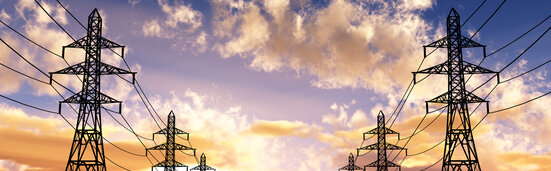

Hello, in this notebook we will take a look at the Hourly/Timeseries Electricity Consumption and Production data set.

***This is an update version that includes one more year of data (March 2023 - March 2024) and a new section with production by year!***

# Imports

Do the imports, noting fancy.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Load the data and quick look

1. After loading the data we set the date time as the index of the data frame.
2. We also check that indeed we have the expected columns, and see the data for the first time.
3. After running the shape command we see that we have 36772 rows and 9 columns in our data set.


In [3]:
df = pd.read_csv("/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv")
df = df.set_index("DateTime")
df.index = pd.to_datetime(df.index)

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

df.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [4]:
print(df.shape)

(46011, 9)


# Plot the data
Now let's get to the fun part, plotting the data!

### General Consumption and Production

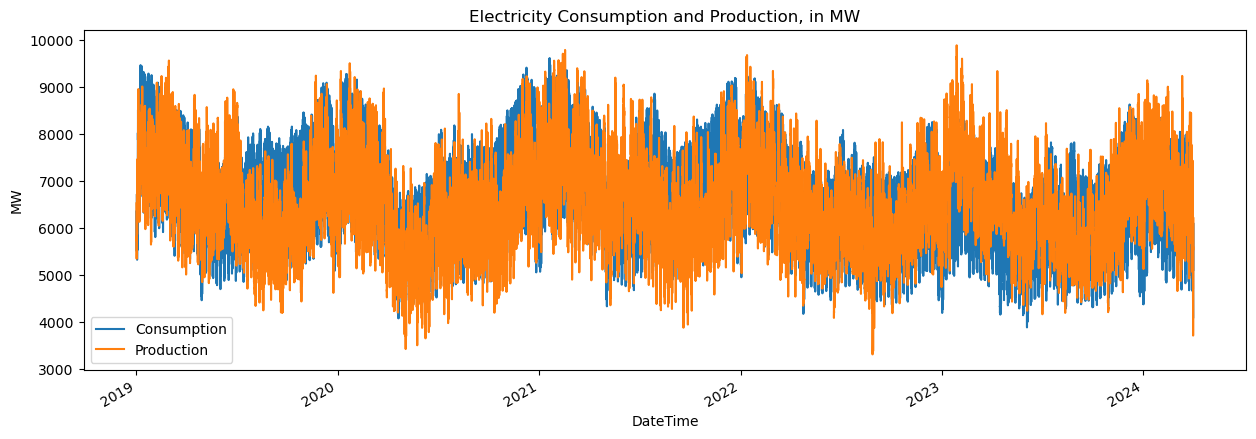

In [5]:
# Let's start with a broad overview, this is the electricity consumption and production plot for our entiere data set

df[["Consumption", "Production"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.ylabel('MW')
plt.show()

### Electircity Export and Imports
When the production is greater than the consumption it means we are exporting electricity, when the value is smaller it means we are importing electricity.
Let's plot this imports versus imports!
**Please note that this section is a little slower (about one minute)**

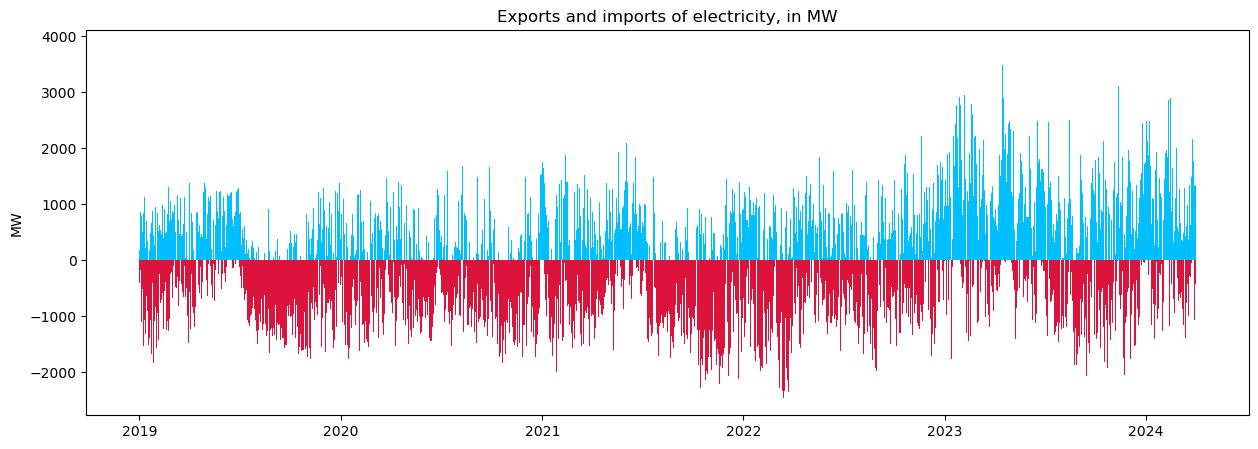

CPU times: user 1min 28s, sys: 1.08 s, total: 1min 29s
Wall time: 1min 28s


In [6]:
%%time

# add a new column for the delta
df["delta"] = df["Production"] - df["Consumption"]

plt.rcParams["figure.figsize"] = (15,5)

plt.bar(
    df.index, df['delta'],
    color=np.where(df['delta'] > 0, 'deepskyblue', 'crimson')
)

plt.title("Exports and imports of electricity, in MW")
plt.ylabel('MW')
plt.show()

# drop the column we have used for the delta
df.drop(["delta"], axis=1, inplace=True)

### Weekly electricity consumption

Now let's look at the electricity consumption for a week. This is a graph I like quite a lot, as is the "graph of human activity", becouse it fallows human patterns.

We notice that the five work days apre pretty much identical and that the weekend and particularly Sunday are more lazy.

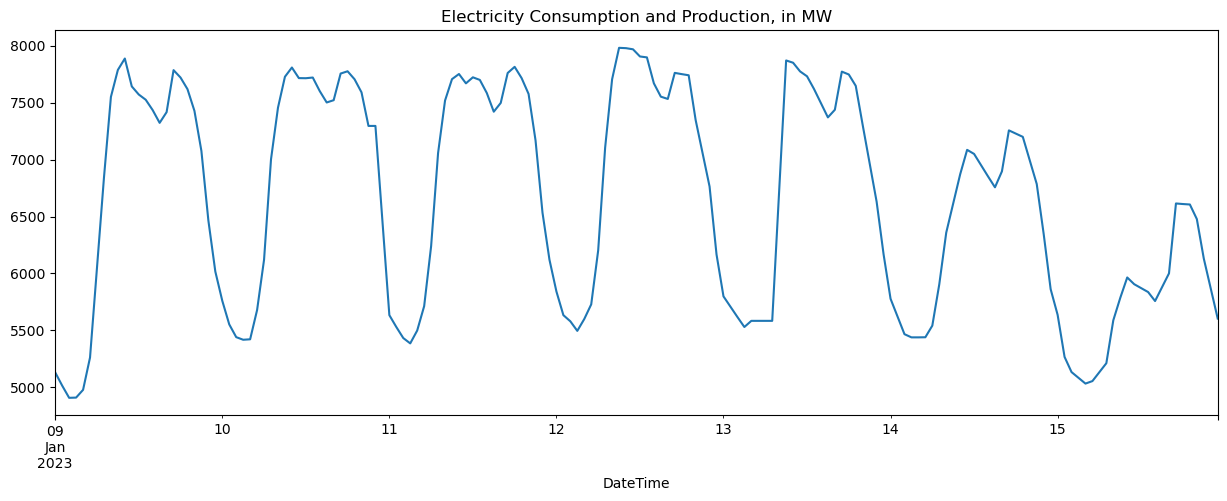

In [7]:
df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"]["Consumption"].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.show()

### Electricity Production by Type
Now let us look at the yearly production of electricity per production type, I also find this graphs very interesting

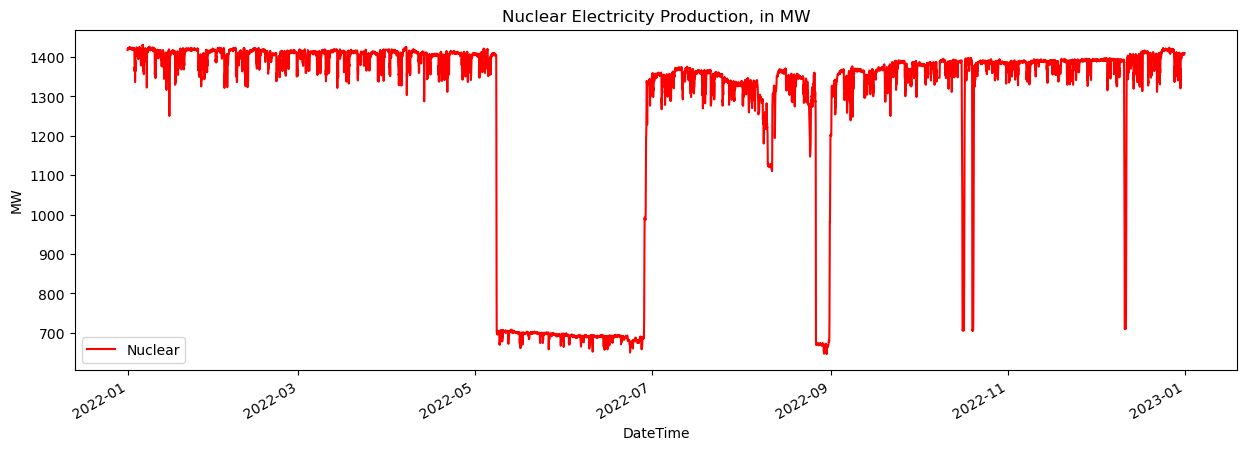

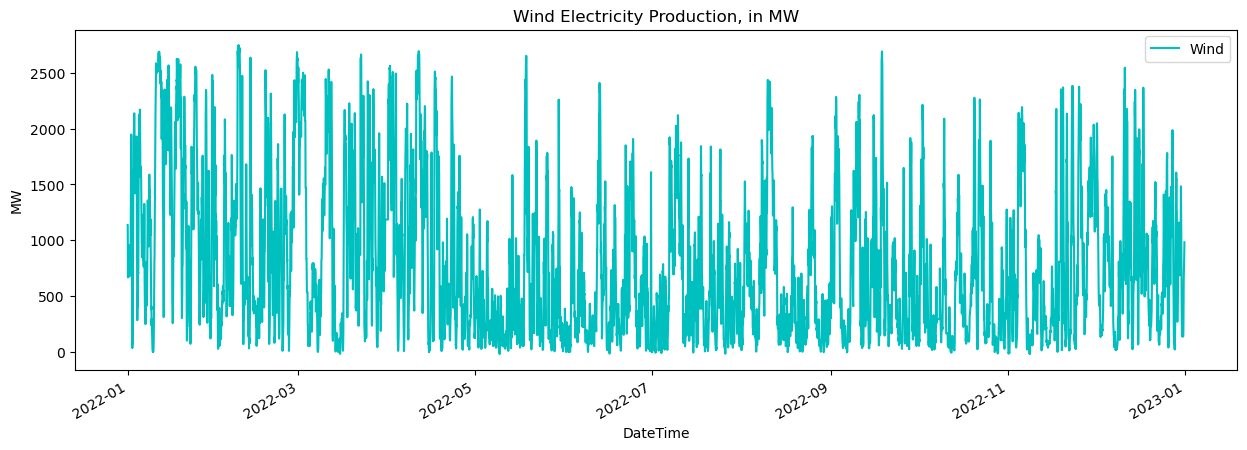

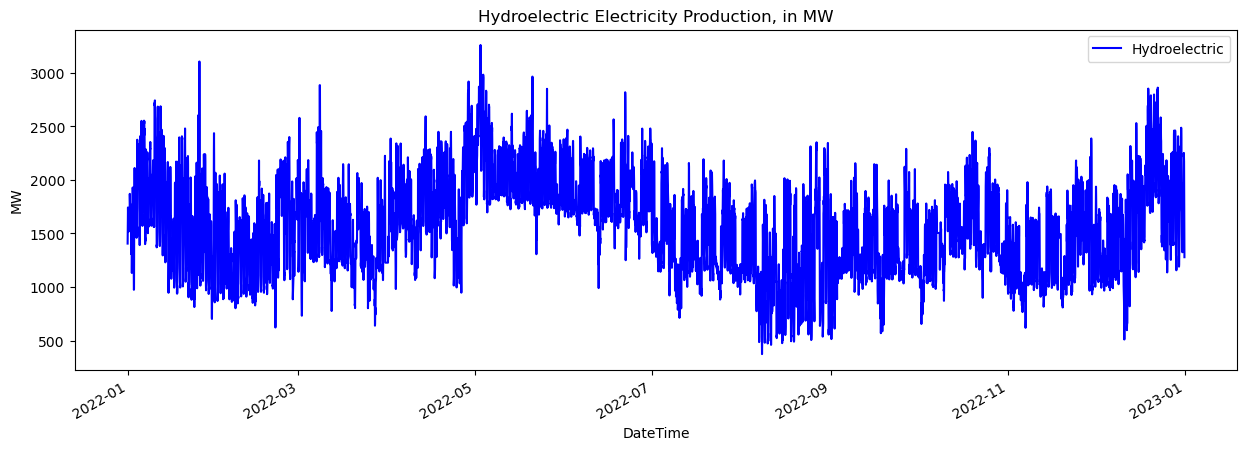

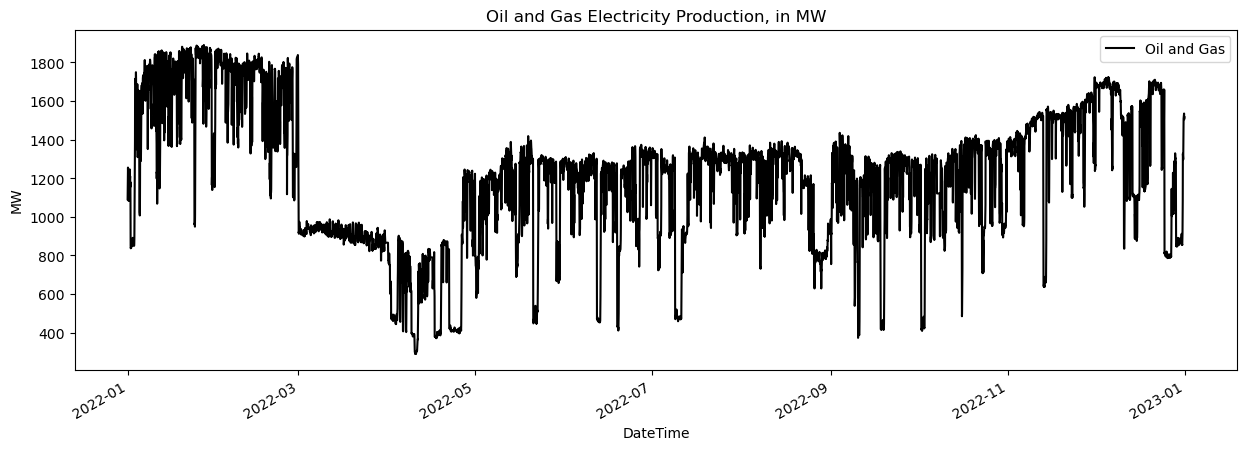

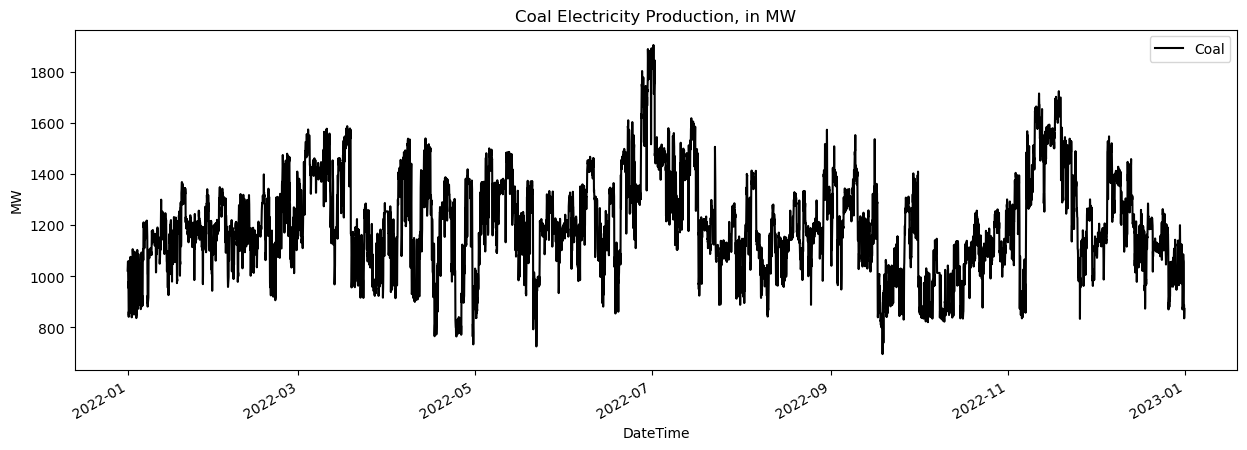

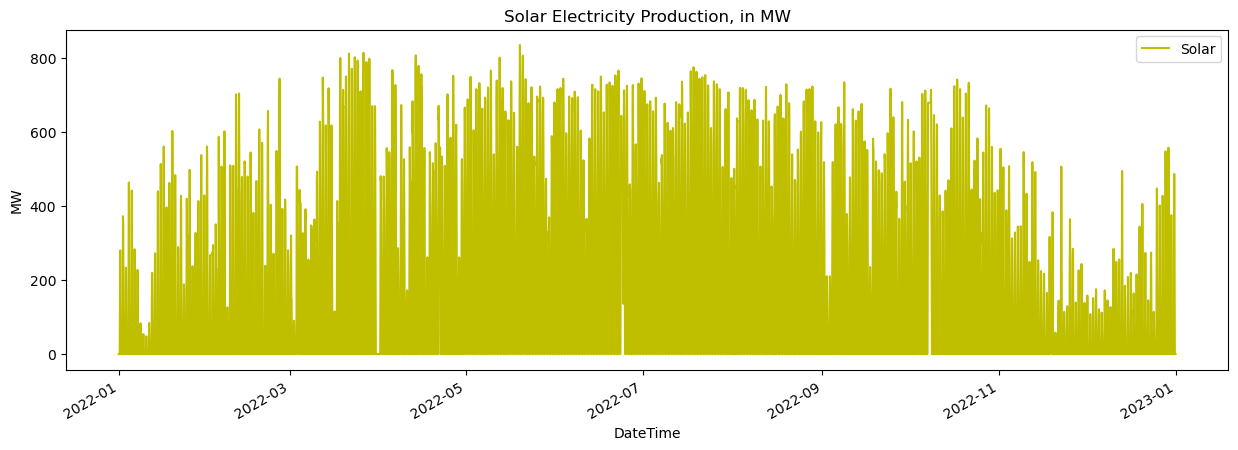

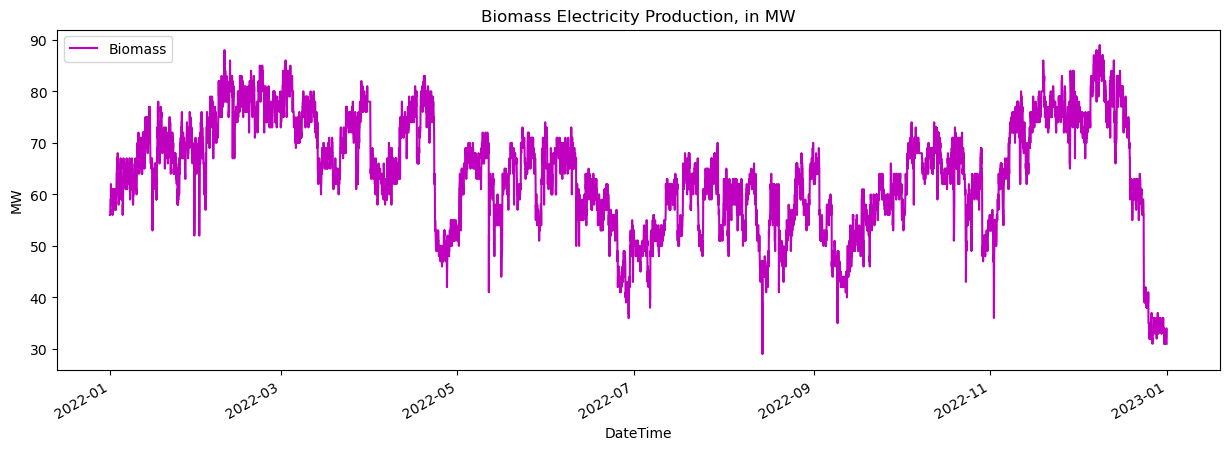

In [8]:
dfYear = df["2022-01-01 00:00:00" : "2022-12-31 23:59:59"]
productionTypes = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

colorMap = {"Nuclear":"r", "Wind":"c", "Hydroelectric":"b", "Oil and Gas":"k", "Coal":"k", "Solar":"y", "Biomass":"m"}

for productionType in productionTypes:
    dfYear[[productionType]].plot(style="-", figsize=(15, 5), title=f"{productionType} Electricity Production, in MW", color=colorMap.get(productionType))
    plt.ylabel('MW')
    plt.show()

### Renewables inspection

We are fortunate to have data for renewables, we will look at hydroelectric, wind and solar generation types. I have chosen the sumer time in order to be as fair as possible to solar.

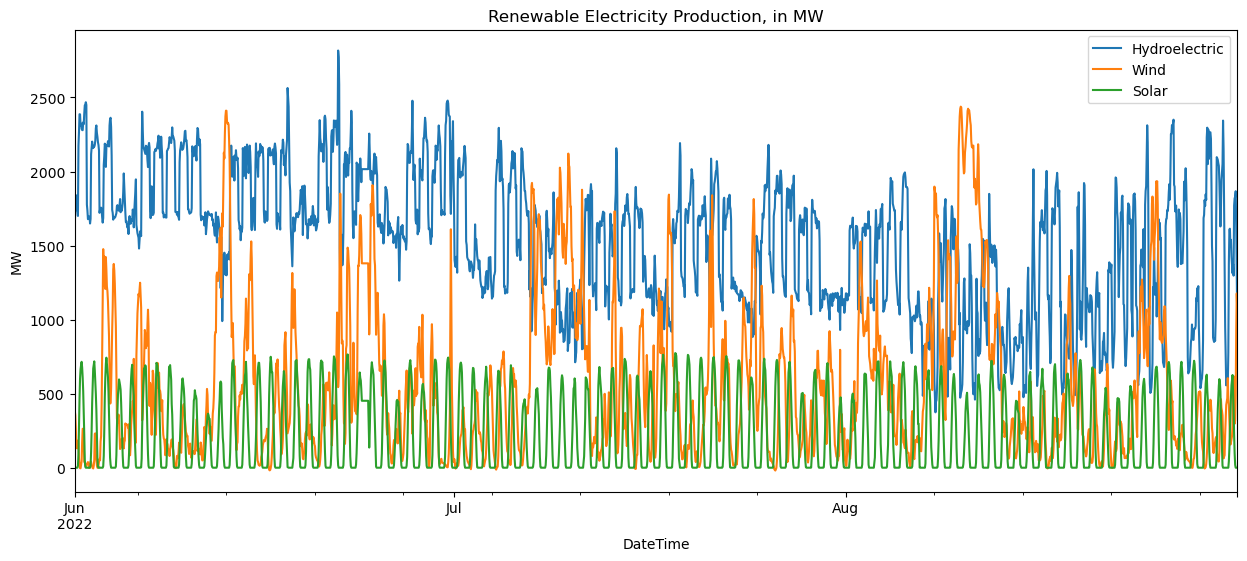

In [9]:
dfSummer = df[["Hydroelectric", "Wind", "Solar"]]["2022-06-01 00:00:00" : "2022-08-31 23:59:59"]
dfSummer.plot(style="-", figsize=(15, 6), title=f"Renewable Electricity Production, in MW")
plt.ylabel('MW')
plt.show()

# Production by type per year

In this section we will plot the electricity production by type per year as nice pie charts. Please note that as we have data for 2024 just until the end of march data may not be so relevant for 2024 (not much sum yet :D )

In the first code section we prepare the data by grouping it by year, and in the next section we do the actual plotting.

In [10]:
groupedByYear = df.groupby(df.index.year, group_keys=True)

statsByYear = {}

for g in groupedByYear:
    print(g[0], len(g[1]), type(g[1]))

    stats = {}

    totalHydroelectric = 0
    for v in g[1]["Hydroelectric"]:
        totalHydroelectric += v
    stats["Hydroelectric"] = totalHydroelectric

    totalNuclear = 0
    for v in g[1]["Nuclear"]:
        totalNuclear += v
    stats["Nuclear"] = totalNuclear

    totalWind = 0
    for v in g[1]["Wind"]:
        totalWind += v
    stats["Wind"] = totalWind

    totalOilandGas = 0
    for v in g[1]["Oil and Gas"]:
        totalOilandGas += v
    stats["Oil and Gas"] = totalOilandGas

    totalCoal = 0
    for v in g[1]["Coal"]:
        totalCoal += v
    stats["Coal"] = totalCoal

    totalSolar = 0
    for v in g[1]["Solar"]:
        totalSolar += v
    stats["Solar"] = totalSolar

    totalBiomass = 0
    for v in g[1]["Biomass"]:
        totalBiomass += v
    stats["Biomass"] = totalBiomass

    statsByYear[g[0]] = stats

2019 8761 <class 'pandas.core.frame.DataFrame'>
2020 8785 <class 'pandas.core.frame.DataFrame'>
2021 8761 <class 'pandas.core.frame.DataFrame'>
2022 8761 <class 'pandas.core.frame.DataFrame'>
2023 8760 <class 'pandas.core.frame.DataFrame'>
2024 2183 <class 'pandas.core.frame.DataFrame'>


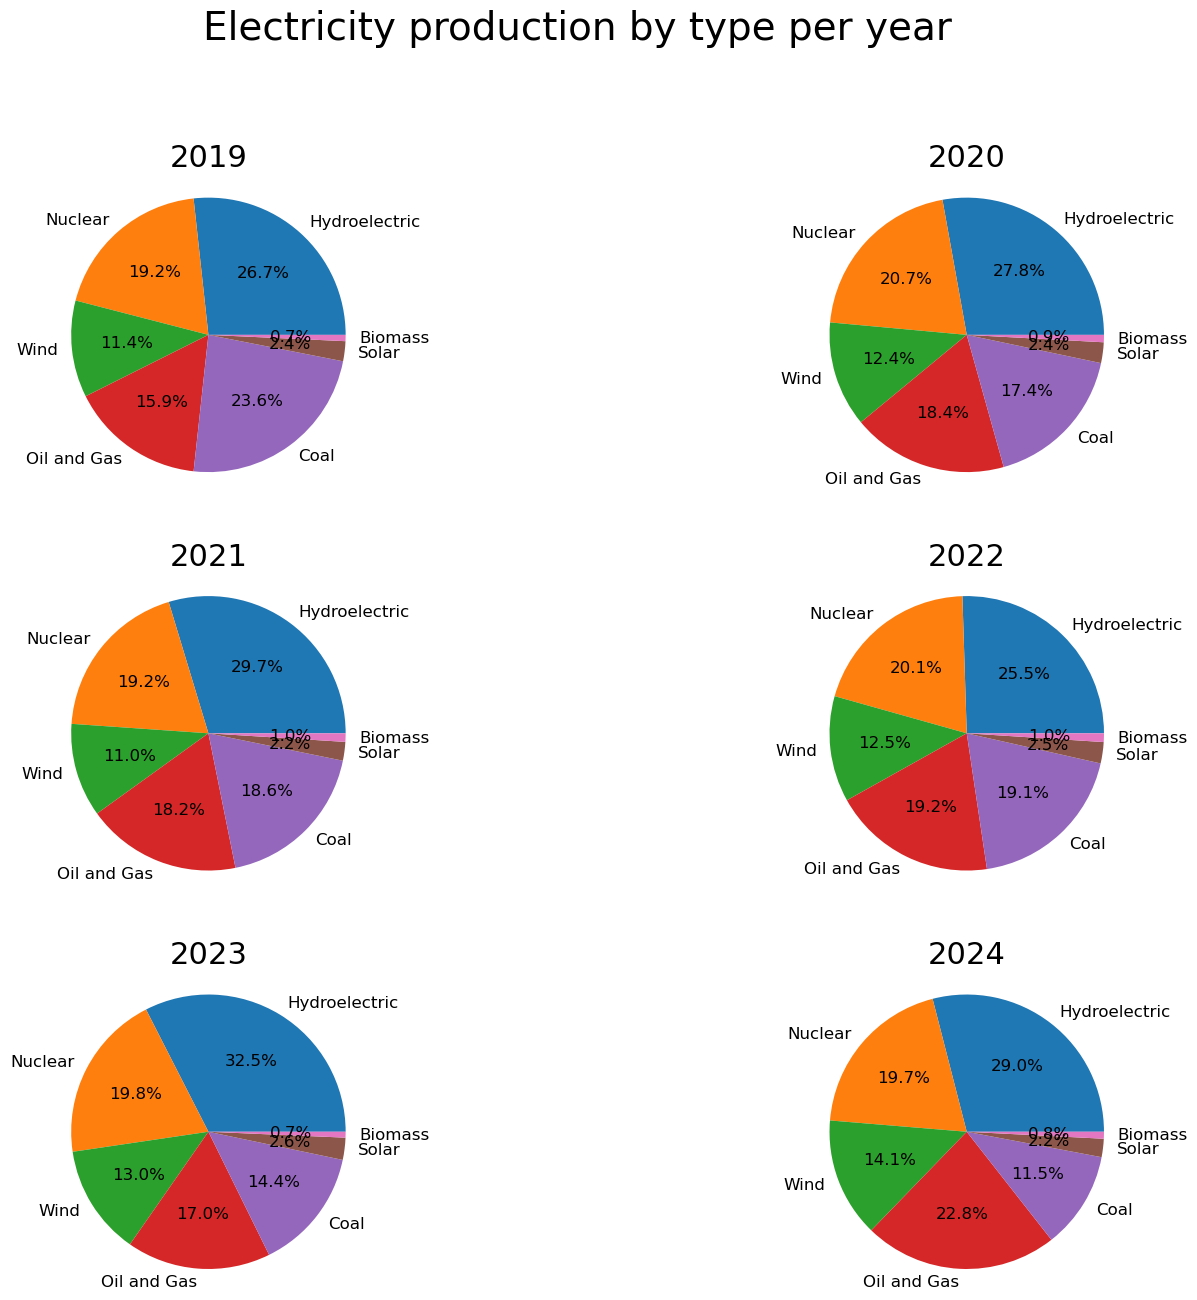

In [11]:
fig, axs = plt.subplots(int(math.ceil(len(statsByYear) / 2)), 2, figsize=(16, 14))
fig.suptitle("Electricity production by type per year", size=28)
fig.tight_layout(pad=6)

for (k, v), ax in zip(statsByYear.items(), axs.flatten()):

    labels = list(v.keys())
    arr = np.array(list(v.values()))

    ax.pie(arr, labels = labels, autopct = '%1.1f%%', radius = 1.2, textprops={'fontsize': 12})
    ax.set_title(k, pad=18, size=22)

# Conclusion
I think this is a very interesting dataset. In my opinion it shows that hidroelectric and nuclear electricity production are the most reliable, but they still suffer from weather (in the case of hydroelectric) and mentanance in the case of nuclear.

Wind is not predictible at all, but when it blows it can gnerate big electricity outputs.

Gas and oil are still a big part of electricity production and they where affeted by the onset of the Ukraine war.

A balanced grid needs a few types of electricity production and to be connected with it's neighbours (import and export)

# Finish
You made it to the finish, thank you!